In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

# 결측치가 있는 특성
# LotFrontage : 부지에 연결된 거리의 선형 피트
# Alley : 골목길 접근 유형 -> 골목길과 연결이 되어있는가
# MasVnrType : 외벽 마감재 유형
# MasVnrArea : 외벽 마감재 면적
# BsmtQual : 지하실 높이
# BsmtCond : 지하실 상태
# BsmtExposure : 워크아웃 또는 정원 수준의 지하실 벽
# BsmtFinType1 : 지하실 완성 구역의 품질
# BsmtFinType2 : 두 번째로 완성된 영역의 품질(존재하는 경우)
# Electrical : 전기 시스템
# FireplaceQu : 벽난로 품질
# GarageType : 차고 위치
# GarageYrBlt : 차고가 지어진 연도
# GarageFinish : 차고 내부 마감
# GarageQual : 차고 품질
# GarageCond : 차고 상태
# PoolQC : 풀 품질
# Fence : 울타리 품질
# MiscFeature : 다른 카테고리에 포함되지 않은 기타 기능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

수치형 : LotFrontage, LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

레이블 : OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC, Fence

범주형 : MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, Functional, GarageType, GarageFinish, PavedDrive, MiscFeature, SaleType, SaleCondition

In [65]:
x_train = train.copy()

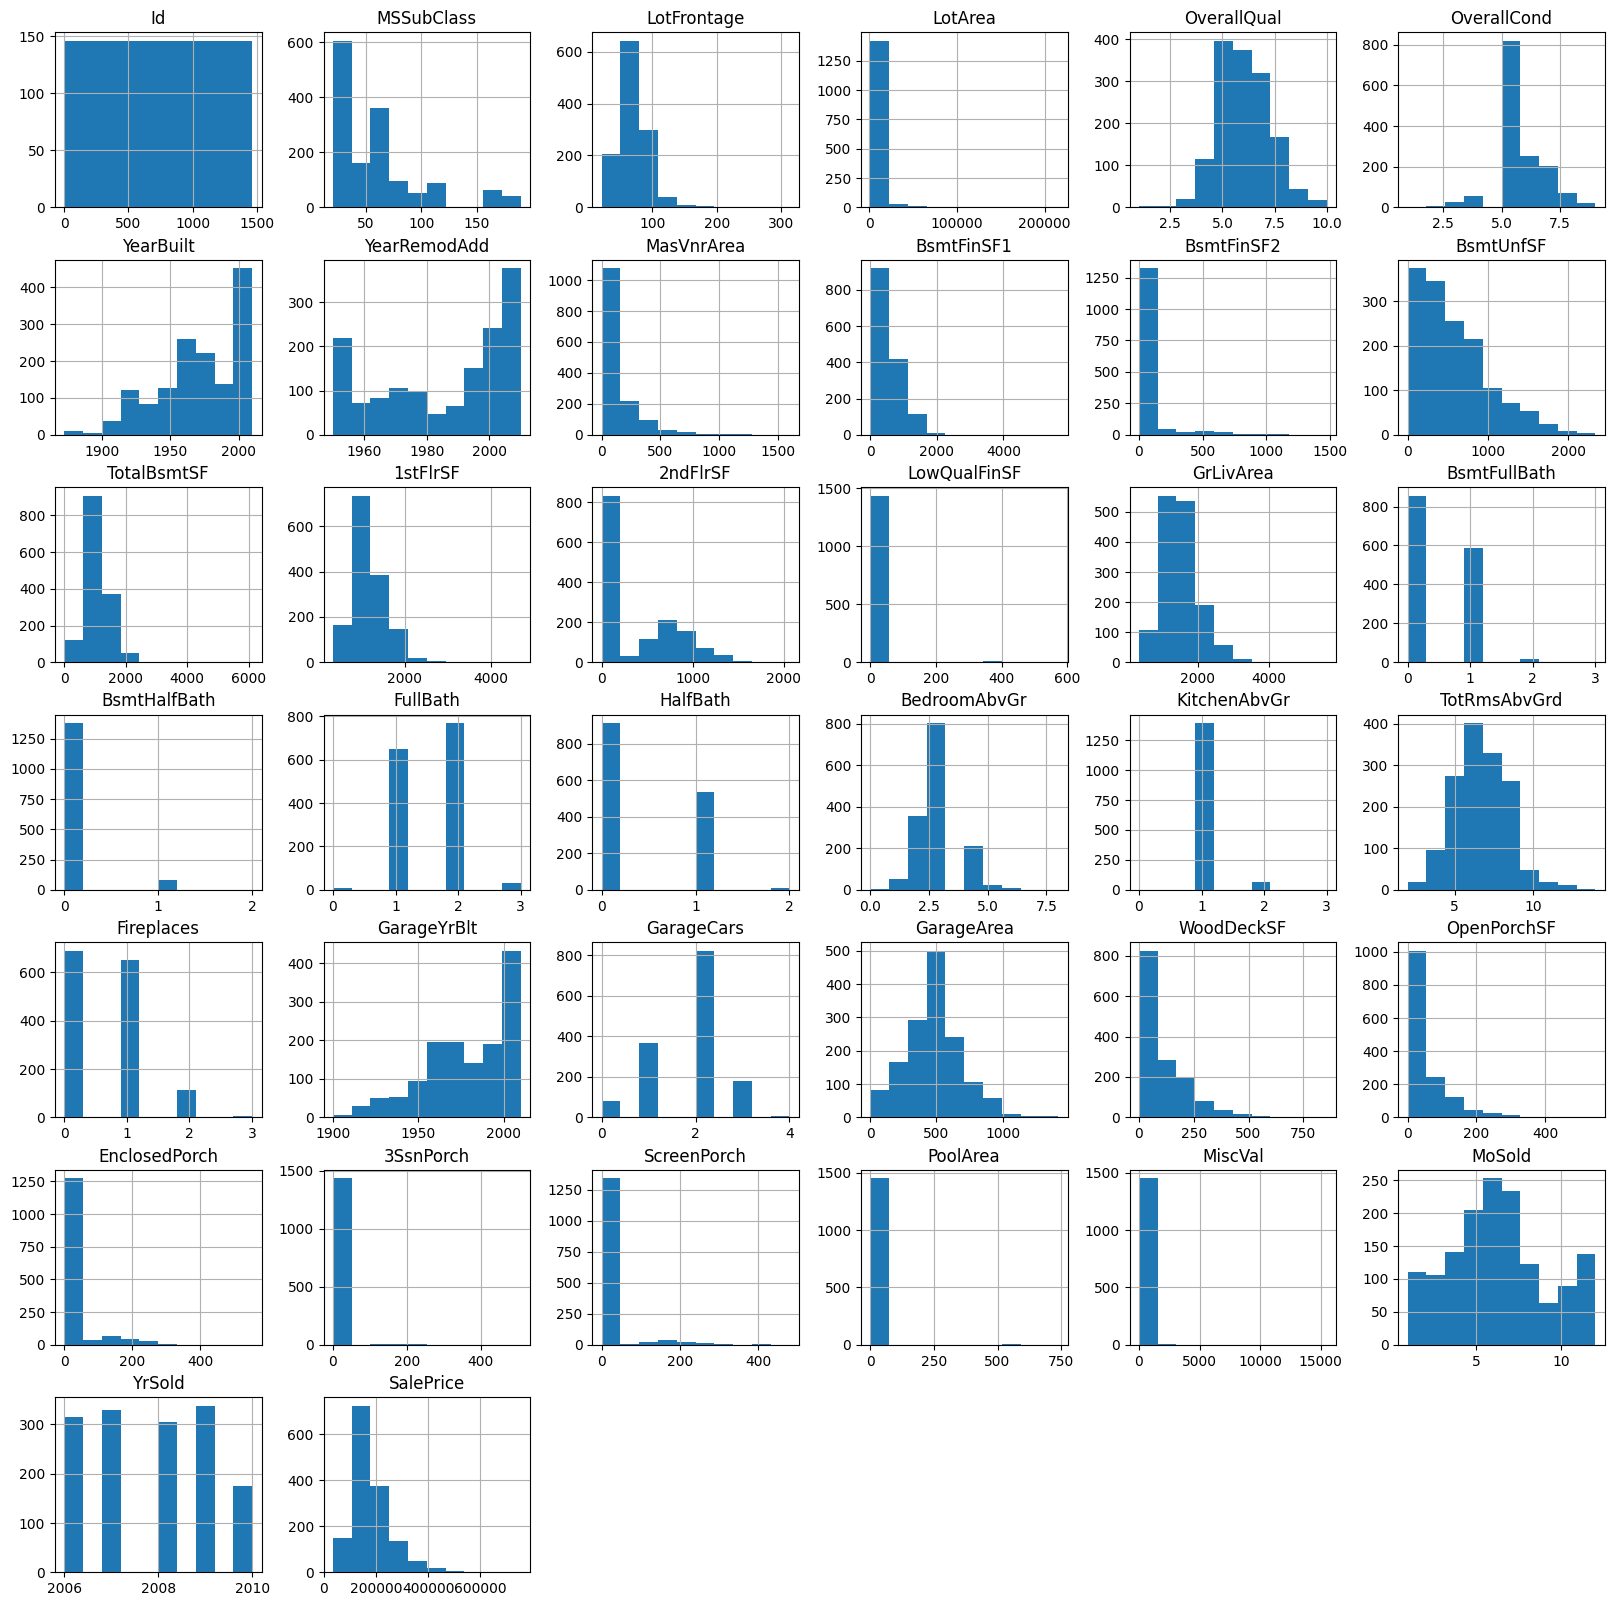

In [ ]:
x_train.hist(figsize = (20, 20))

plt.show()

In [ ]:
x_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

x_train.fillna({'LotFrontage': 0}, inplace = True)
x_train.fillna({'Alley': 'No Alley Access'}, inplace = True)
x_train.fillna({'MasVnrType': 'No MasVnr'}, inplace = True)
x_train.fillna({'MasVnrArea': 0}, inplace = True)
x_train.fillna({'BsmtQual': 'No Basement Qual'}, inplace = True)
x_train.fillna({'BsmtCond': 'No Basement Cond'}, inplace = True)
x_train.fillna({'BsmtExposure': 'No Basement Exposure'}, inplace = True)
x_train.fillna({'BsmtFinType1': 'No Basement Type1'}, inplace = True)
x_train.fillna({'BsmtFinType2': 'No Basement Type2'}, inplace = True)
x_train.fillna({'Electrical': 'SBrkr'}, inplace = True)
x_train.fillna({'FireplaceQu': 'No FireplaceQu'}, inplace = True)
x_train.fillna({'GarageType': 'No Garage'}, inplace = True)
x_train.fillna({'GarageYrBlt': 0}, inplace = True)
x_train.fillna({'GarageFinish': 'No Garage Finish'}, inplace = True)
x_train.fillna({'GarageQual': 'No Garage Qual'}, inplace = True)
x_train.fillna({'GarageCond': 'No Garage Cond'}, inplace = True)
x_train.fillna({'PoolQC': 'No Pool'}, inplace = True)
x_train.fillna({'Fence': 'No Fence'}, inplace = True)
x_train.fillna({'MiscFeature': 'No MiscFeature'}, inplace = True)

x_train['MSSubClass'] = x_train['MSSubClass'].astype(object)

nums = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
        'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']

labels = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
          'PoolQC']

cats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence',
        'MiscFeature', 'SaleType', 'SaleCondition']

scaler = StandardScaler()
encoder = LabelEncoder()

x_train[nums] = scaler.fit_transform(x_train[nums])

for i in labels:
  x_train[i] = encoder.fit_transform(x_train[i])

# 처리하지 않은 특성 OverallQual, OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold, SalePrice

In [39]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_remod
0,1,60,RL,0.212877,-0.207142,Pave,No Alley Access,Reg,Lvl,AllPub,...,3,No Fence,No MiscFeature,-0.087688,2,0.138777,WD,Normal,0.347273,1
1,2,20,RL,0.645747,-0.091886,Pave,No Alley Access,Reg,Lvl,AllPub,...,3,No Fence,No MiscFeature,-0.087688,5,-0.614439,WD,Normal,0.007288,1
2,3,60,RL,0.299451,0.073480,Pave,No Alley Access,IR1,Lvl,AllPub,...,3,No Fence,No MiscFeature,-0.087688,9,0.138777,WD,Normal,0.536154,0
3,4,70,RL,0.068587,-0.096897,Pave,No Alley Access,IR1,Lvl,AllPub,...,3,No Fence,No MiscFeature,-0.087688,2,-1.367655,WD,Abnorml,-0.515281,0
4,5,60,RL,0.761179,0.375148,Pave,No Alley Access,IR1,Lvl,AllPub,...,3,No Fence,No MiscFeature,-0.087688,12,0.138777,WD,Normal,0.869843,1


In [67]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(x_train, columns = x_train[cats].columns, dtype = int)
Y = X['SalePrice']
X.drop(['Id', 'SalePrice'], axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [48]:
!pip install catboost

In [68]:
import catboost
from sklearn.metrics import root_mean_squared_error

cat_reg = catboost.CatBoostRegressor(verbose = False, random_state = 42)

cat_reg.fit(X_train, y_train)

pred = cat_reg.predict(X_test)

root_mean_squared_error(y_test, pred)

0.31835992368601074

26394.140553178444

-- 성능 증가 --

SalePrice StandardScaler

-- 성능 감소 --

집 리모델링 여부 추가

In [71]:
inv_pred = pred * scaler.scale_[-1] + scaler.mean_[-1]
inv_true = y_test * scaler.scale_[-1] + scaler.mean_[-1]

root_mean_squared_error(inv_true, inv_pred)

26876.307534776428

In [ ]:
importances = {}
for i, j in zip(cat_reg.feature_names_, cat_reg.feature_importances_):
  importances[i] = j

importances = sorted(importances.items(), key = lambda x: x[1], reverse = True)

In [ ]:
importances

[('OverallQual', 20.924040900590093),
 ('GrLivArea', 14.947043011905855),
 ('1stFlrSF', 5.237690543408843),
 ('BsmtFinSF1', 4.625326250283414),
 ('LotArea', 4.144119278171788),
 ('GarageCars', 4.015337490047162),
 ('TotalBsmtSF', 3.8484847806812637),
 ('YearBuilt', 2.943309250095326),
 ('Fireplaces', 2.5712381515378198),
 ('ExterQual', 2.4528874177692592),
 ('YearRemodAdd', 2.023111987956749),
 ('GarageYrBlt', 1.9827918622544907),
 ('BsmtQual', 1.8817684974116546),
 ('2ndFlrSF', 1.5500169900697764),
 ('OverallCond', 1.5112658475361078),
 ('GarageArea', 1.2840274739308326),
 ('TotRmsAbvGrd', 1.2168914300801468),
 ('KitchenQual', 1.2085956727693654),
 ('FullBath', 1.1821705798735838),
 ('OpenPorchSF', 1.1646360760271262),
 ('BsmtExposure', 0.8670290520224622),
 ('LotFrontage', 0.8113195818765557),
 ('BedroomAbvGr', 0.8049768434719194),
 ('MSSubClass_60', 0.7934748889526491),
 ('HalfBath', 0.7795783659430467),
 ('BsmtFullBath', 0.7721963467380718),
 ('BsmtFinType1_GLQ', 0.7248338176379993